In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
data = np.loadtxt("datos_recta.dat")
x_obs = data[:,0]
y_obs = data[:,1]
sigma_obs = data[:,2]

<ErrorbarContainer object of 3 artists>

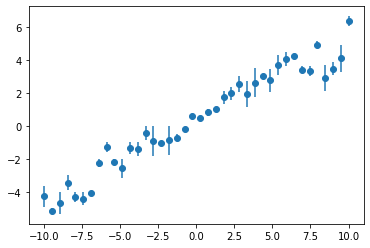

In [ ]:
plt.errorbar(data[:,0], data[:,1], data[:,2], fmt="o")#la pridata[:,0]mera columna es x la segunda y y la tercera son errores.

Deseo encontar la probabilidad de los parametros dado las observaciones

$P(parametros|obs)\alpha P(obs|parametros)*P(parametros)$ donde se asumira un prior constante y se absorbe en la consante de normalizacion.

$P(m,b |obs )\alpha P(obs | m,b)$

In [ ]:
def modelo(x_obs,m,b):
  return (x_obs*m)+b

def likelihood(x_obs, y_obs, sigma_obs,m,b):
  y_modelo=modelo(x_obs,m,b)
  x = np.sum((y_modelo-y_obs)/sigma_obs)
  return  np.exp(-0.5*x**2) # se omite porque se usara MCMC y los cocientes cancelan las constantes




In [ ]:
n_iter = 100
m_walk = np.zeros(n_iter)
b_walk = np.zeros(n_iter)
for i in range(1,n_iter):
  m_prime = np.random.normal(m_walk[i-1],0.1)
  b_prime = np.random.normal(b_walk[i-1],0.1)


l_now =likelihood(x_obs, y_obs, sigma_obs, m_walk[i-1], b_walk[i-1])
l_next= likelihood(x_obs, y_obs, sigma_obs, m_prime, b_prime)


Lo anterior tiene problemas numericos ya que l_now, l_next dan cero y al definir el gamma se usa la division entre ellos y pailas para eso se usa la log de la likelihood.


In [ ]:
def loglikelihood(x_obs, y_obs, sigma_obs,m,b):
  y_modelo=modelo(x_obs,m,b)
  x = np.sum((y_modelo-y_obs)**2/sigma_obs**2)
  return  -0.5*x # se omite porque se usara MCMC y los cocientes cancelan las constantes


In [ ]:
n_iter = 10000
m_walk = np.zeros(n_iter)
b_walk = np.zeros(n_iter)
for i in range(1,n_iter): #aca se hace explicito porque solo son dos paremtros en el sigueinte ejemplo son 5 dimensiones
  m_prime = np.random.normal(m_walk[i-1],0.05)
  b_prime = np.random.normal(b_walk[i-1],0.05)

  l_now =loglikelihood(x_obs, y_obs, sigma_obs, m_walk[i-1], b_walk[i-1])
  l_next= loglikelihood(x_obs, y_obs, sigma_obs, m_prime, b_prime)
  gamma = np.min([1.0,np.exp(l_next-l_now)])
  #print(gamma)  #cuando gamma es 1 se rechaza salto, 0 acepta el paso
  alpha = np.random.random()
  if alpha<gamma:
    m_walk[i]= m_prime
    b_walk[i]= b_prime
  else:
    m_walk[i]= m_walk[i-1]
    b_walk[i]= b_walk[i-1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.


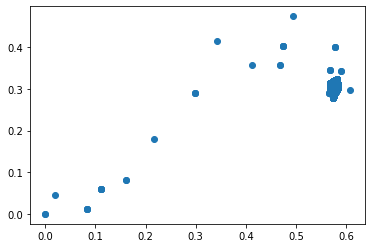

In [ ]:
plt.scatter(m_walk,b_walk)

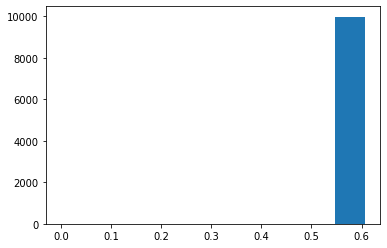

In [ ]:
_ = plt.hist(m_walk)

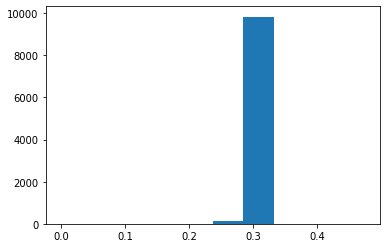

In [ ]:
_=plt.hist(b_walk)

In [ ]:
m_best= np.mean(m_walk)
m_error=np.std(m_walk)
print(m_best,m_error)

0.5742890145412457 0.019917662087683922


In [ ]:
b_best = np.mean(b_walk)
b_error=np.std(b_walk)
print(b_best,b_error)

0.3036752216355255 0.012708815362112975


In [ ]:
x_teorico = np.linspace(x_obs.min(),x_obs.max(),100)
y_teorico = modelo (x_teorico,m_best,b_best)

<ErrorbarContainer object of 3 artists>

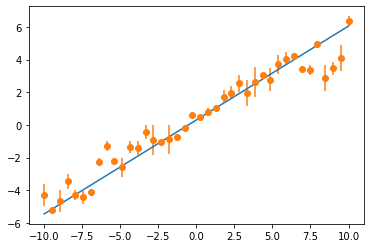

In [ ]:
plt.plot(x_teorico,y_teorico)
plt.errorbar(data[:,0], data[:,1], data[:,2], fmt="o")

In [ ]:
#################################################################################

data = np.loadtxt("notas_andes.dat")

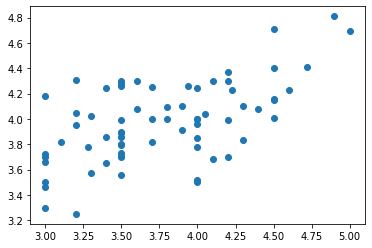

In [ ]:
plt.scatter(data[:,0],data[:,4])

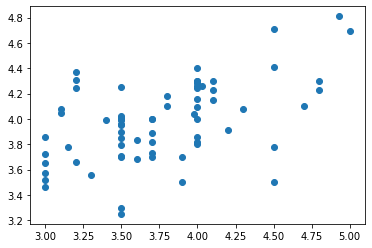

In [ ]:
plt.scatter(data[:,1],data[:,4]) # no hay tanta correlacion

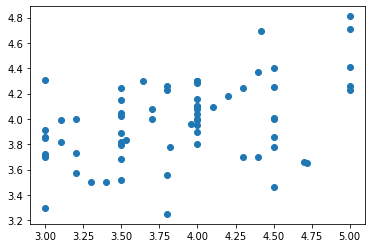

In [ ]:
plt.scatter(data[:,2],data[:,4])

In [ ]:
def model(x,betas):
  y = betas[0]
  for i in range(1,len(betas)):
    y =y+betas[i]*x[i-1]
  return y

In [ ]:
#def loglike(x_obs,y_obs,sigma_y_obs,betas): # no se porque no funciona
#  y_modelo = model(x_obs,betas)
#  x = np.sum((y_modelo-y_obs)**2/sigma_y_obs**2)
#  return  -0.5*x 


In [ ]:
def loglike(x_obs,y_obs,sigma_y_obs,betas):
  n_obs=len(y_obs)
  l=0
  for i in range(n_obs):
    l=l-0.5*(y_obs[i]-model(x_obs[i,:],betas))**2/sigma_y_obs[i]**2
  return l

In [ ]:
x_obs=data[:,:4]
y_obs=data[:,4]
sigma_y_obs=np.ones(len(y_obs))*0.1 #las notas usualmente tienen redondeos

n_iteraciones=10000
betas=np.zeros([n_iteraciones,5]) #5 parametros para cada iteracion
for i in range (1,n_iteraciones):
  betas_now = betas[i-1,:]
  betas_next = betas_now + np.random.normal(scale=0.01, size=5)
  loglike_now = loglike(x_obs,y_obs,sigma_y_obs,betas_now)
  loglike_next = loglike(x_obs,y_obs,sigma_y_obs,betas_next)
  gamma = np.min([np.exp(loglike_next-loglike_now),1.0])
  alpha=np.random.random()
  if alpha<gamma:
    betas[i,:]=betas_next
  else:
    betas[i,:]= betas_now


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in exp
  if sys.path[0] == '':


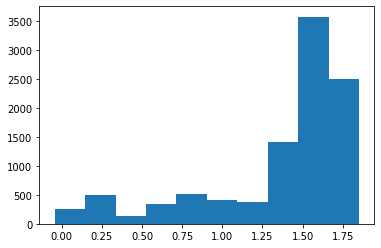

In [ ]:
_=plt.hist(betas[:,0])

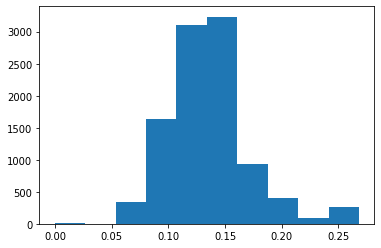

In [ ]:
_=plt.hist(betas[:,1])

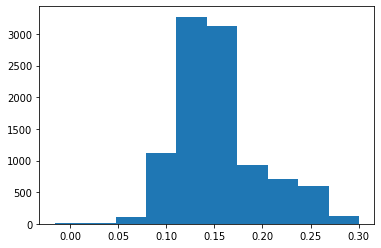

In [ ]:
_=plt.hist(betas[:,2])

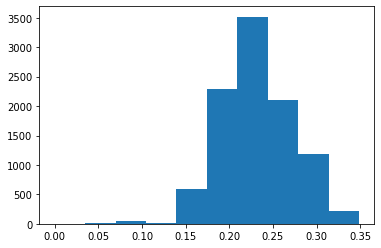

In [ ]:
_=plt.hist(betas[:,4])

In [ ]:
for i in range(5):
  print("beta {}: {:.2f}+/-{:.2f}".format (i,np.mean(betas[:,i]),np.std(betas[:,i])))

beta 0: 1.36+/-0.46
beta 1: 0.14+/-0.04
beta 2: 0.15+/-0.04
beta 3: 0.15+/-0.04
beta 4: 0.23+/-0.04
